In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import sys
sys.path.append(os.path.abspath("../../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_escaldo=pd.read_csv("..\..\..\datos\datos1\datos_clusterizados1_encoded_sinout.csv", index_col=0)

In [3]:
df_escaldo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4493 entries, 0 to 4492
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales_unitario            4493 non-null   float64
 1   Ship Mode_First Class     4493 non-null   float64
 2   Ship Mode_Same Day        4493 non-null   float64
 3   Ship Mode_Second Class    4493 non-null   float64
 4   Ship Mode_Standard Class  4493 non-null   float64
 5   Segment_Consumer          4493 non-null   float64
 6   Segment_Corporate         4493 non-null   float64
 7   Segment_Home Office       4493 non-null   float64
 8   Quantity_entre 1 y 2      4493 non-null   float64
 9   Quantity_entre 11 y 12    4493 non-null   float64
 10  Quantity_entre 13 y 14    4493 non-null   float64
 11  Quantity_entre 13 y14     4493 non-null   float64
 12  Quantity_entre 3 y 4      4493 non-null   float64
 13  Quantity_entre 5 y 6      4493 non-null   float64
 14  Quantity_entr

In [4]:
df_escaldo.head()

,Sales_unitario,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,307.95,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,1.67,-0.00,1.20
1,497.45,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.26,1.67,0.54,2.45
2,554.52,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.03,1.67,0.54,1.75
3,419.99,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.04,1.67,6.36,1.90
4,464.86,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.72,0.71,1.05,2.37


Separamos en x e y

In [5]:
x= df_escaldo.drop(columns="Sales_unitario")
y= df_escaldo[["Sales_unitario"]]

In [6]:
x.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Quantity_entre 1 y 2,Quantity_entre 11 y 12,Quantity_entre 13 y 14,Quantity_entre 13 y14,Quantity_entre 3 y 4,Quantity_entre 5 y 6,Quantity_entre 7 y 8,Quantity_entre 9 y 10,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,City_standard,Category_standard,Sub-Category_standard,Discount_standard
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,1.67,-0.00,1.20
1,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.26,1.67,0.54,2.45
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.03,1.67,0.54,1.75
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.04,1.67,6.36,1.90
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.72,0.71,1.05,2.37


In [7]:
y.head()

,Sales_unitario
0,307.95
1,497.45
2,554.52
3,419.99
4,464.86


Separamos en train y test y le hacemos aprender

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [9]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [10]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [11]:
metricas_pd=pd.DataFrame(metricas)

In [12]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.37,40.66,"4,559.84",67.53
test,0.33,42.45,"5,334.83",73.04


In [13]:
metricas_pd.reset_index(inplace=True)

In [14]:
metricas_pd.T

,0,1,2,3
index,r2_score,MAE,MSE,RMSE
train,0.37,40.66,"4,559.84",67.53
test,0.33,42.45,"5,334.83",73.04


Dado que coinciden bastante las RMSE, no se está dando un gran over fitting 

Vamos a intentar visualizar las cositas

In [15]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [16]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [17]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [18]:
df_fin.columns= ["test pre", "train pre", "Sales_unitario"]

In [19]:
df_fin.reset_index(inplace=True)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [20]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [21]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [22]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [23]:
metricas80_pd=pd.DataFrame(metricas80)

In [24]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.38,40.87,"4,670.90",68.34
test,0.30,42.22,"5,166.25",71.88


In [25]:
metricas80_pd.reset_index(inplace=True)

In [26]:
metricas80_pd

,index,train,test
0,r2_score,0.38,0.30
1,MAE,40.87,42.22
2,MSE,"4,670.90","5,166.25"
3,RMSE,68.34,71.88


Se está dando over fitting y under fitting asi que mejor el de 70% train 30% test

Vamos a intentar visualizar las cositas

In [27]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [28]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [29]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [30]:
df_fin80.columns= ["test pre80", "train pre80", "Sales_unitario"]

In [31]:
df_fin80.reset_index(inplace=True)

<Figure size 1000x800 with 0 Axes>

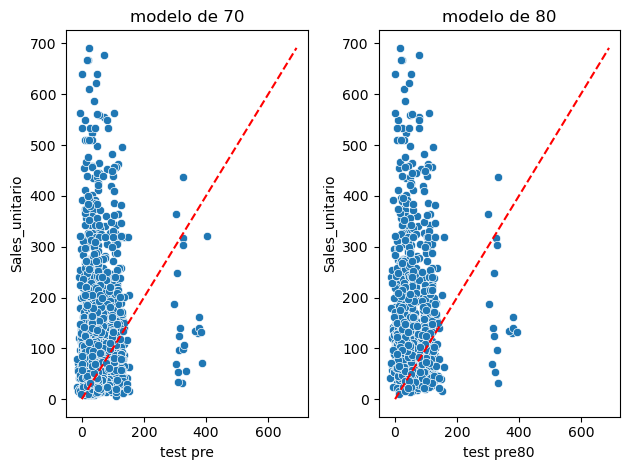

In [32]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="Sales_unitario", data= df_fin, ax=axes[0])
axes[0].plot([df_fin["Sales_unitario"].min(), df_fin["Sales_unitario"].max()],
         [df_fin["Sales_unitario"].min(), df_fin["Sales_unitario"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="Sales_unitario", data= df_fin80, ax= axes[1])
axes[1].plot([df_fin80["Sales_unitario"].min(), df_fin80["Sales_unitario"].max()],
         [df_fin80["Sales_unitario"].min(), df_fin80["Sales_unitario"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [33]:
metricas_pd

,index,train,test
0,r2_score,0.37,0.33
1,MAE,40.66,42.45
2,MSE,"4,559.84","5,334.83"
3,RMSE,67.53,73.04


In [34]:
metricas80_pd

,index,train,test
0,r2_score,0.38,0.30
1,MAE,40.87,42.22
2,MSE,"4,670.90","5,166.25"
3,RMSE,68.34,71.88


DEFINITIVAMENTE, nos quedamos con el modelo de 70% train.

Creamos un dataframe con el valor real y los residuos para ambas formas de entrenar 

In [35]:
df_residuos= y_test_pred - y_test
df_residuos80= y_test_pred80 - y_test80

In [36]:
df_con_residuos=pd.DataFrame()
df_con_residuos=pd.concat([df_con_residuos,df_residuos, y_test], ignore_index=True, axis=1)

df_con_residuos80=pd.DataFrame()
df_con_residuos80=pd.concat([df_con_residuos80,df_residuos80, y_test80], ignore_index=True, axis=1)

In [37]:
df_con_residuos.columns=["residuo", "Sales_unitario_original"]
df_con_residuos80.columns=["residuo80", "Sales_unitario_original80"]

In [38]:
df_con_residuos.head()

,residuo,Sales_unitario_original
157,-27.29,135.29
2526,39.70,10.30
1020,-248.49,320.49
1119,-126.99,219.99
731,-69.66,125.66


In [39]:
df_con_residuos80.head()

,residuo80,Sales_unitario_original80
157,-32.48,135.29
2526,38.83,10.30
1020,-243.43,320.49
1119,-130.30,219.99
731,-72.22,125.66


<Figure size 1000x1800 with 0 Axes>

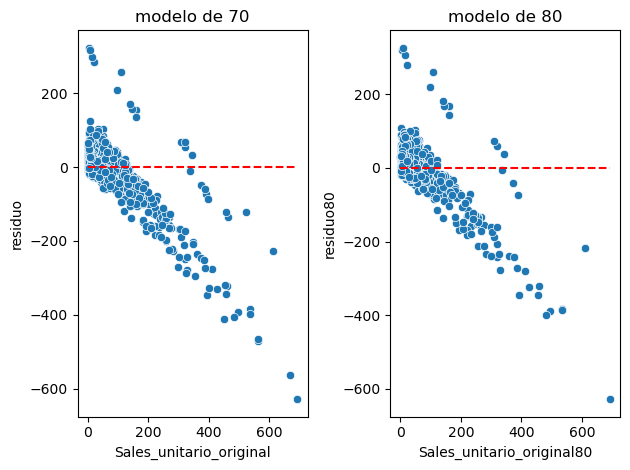

In [40]:
plt.figure(figsize=(10,18))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat


sns.scatterplot(x="Sales_unitario_original", y="residuo", data= df_con_residuos, ax= axes[0])
axes[0].plot([df_con_residuos["Sales_unitario_original"].min(), df_con_residuos["Sales_unitario_original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="Sales_unitario_original80", y="residuo80", data= df_con_residuos80, ax=axes[1])
axes[1].plot([df_con_residuos80["Sales_unitario_original80"].min(), df_con_residuos80["Sales_unitario_original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')

axes[1].set_title("modelo de 80")
plt.tight_layout()

Aquí observamos como los residuos se alejan de la línea 0 que representa que no haya diferencias entre los valores predichos y los valores reales

## Con todo lo anterior hemos comprobado que Sales_unitario no presenta una relación lineal